<a href="https://colab.research.google.com/github/Kdavis2025/Projects/blob/main/Project_3_SQL_Chinook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


Business Case ---> Data Science Problem

SQL is leveraged to analyze customer and employee performance data from the Chinook database, a comprehensive digital media store containing details on customers, employees, sales invoices, and music-related products. **Specifically, this analysis focuses on identifying key business insights such as which customers contribute the highest total sales, determining the employee performance based on customer sales they support, and examining customer sales distribution geographically by city and state.** This targeted analysis enables the business to optimize customer relationship strategies, enhance employee support and training programs, and better align sales efforts with regional customer behaviors.I will use the SQL and SQLite3 module to query the database. Also I will use a series of plots to visualize query results in a compelling manner.

Additional Questions derived from Chinnok ER Diagram

**Customer & Sales Analysis:**
1. Which customers generate the highest total sales?

2. What is the average purchase value per customer by country?

3. Which employee supports the customers with the highest sales?

4. What is the distribution of customer sales across cities and states?

**Product & Popularity Insights:**
1. What are the top 10 best-selling tracks and their corresponding artists?

2. How do sales vary across different media types (e.g., MP3, AAC)?

3. What percentage of total sales comes from each music genre?

4. What are the most common tracks included in customer playlists?

**Geographic & Demographic Insights:**
1. Which regions show increasing sales over time?

2. Are there particular countries or states where specific genres are significantly more popular?

3. What are the top markets (countries) with the highest average spend per transaction?

**Employee Performance & Support:**
1. How does employee performance correlate with total customer sales?

2. Which employees handle the most customers, and how are their customer satisfaction indicators (like total purchases) compared to others?

**Temporal Trends:**
1. Are there specific time periods (months, days of the week, quarters) that have notably higher sales?

2. How have music genre preferences evolved over time within the dataset?

**Revenue and Pricing Insights:**
1. What is the average price per track, and how does it differ by genre or media type?

2. What is the correlation between track length (milliseconds) and popularity or sales volume?

3. These questions provide deeper insights into customer behavior, market trends, product popularity, employee performance, and financial analytics. They leverage multiple entities and their relationships within the Chinook database schema.

## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [ ]:
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download the Chinook sqlite database
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!rm -f chinook.db

In [ ]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Apr  4 11:58 .
drwxr-xr-x 1 root root   4096 Apr  4 11:23 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Apr  4 11:56 chinook.zip
drwxr-xr-x 4 root root   4096 Apr  2 13:35 .config
drwxr-xr-x 1 root root   4096 Apr  2 13:35 sample_data


### Basic Queries


In [ ]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")

Contents of Chinook database

---



In [ ]:
# Display contents and size of database
query = '''
  select *
  from sqlite_master
'''

chinook = pd.read_sql_query( query , db_con)
chinook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      24 non-null     object
 1   name      24 non-null     object
 2   tbl_name  24 non-null     object
 3   rootpage  24 non-null     int64 
 4   sql       23 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [ ]:
# Show size of dataset
query = '''
  select count(*)
  from sqlite_master
'''

pd.read_sql_query( query , db_con)

,count(*)
0,24


#### SELECT (with * and with column names)


In [ ]:
# SELECT the first 10 entries from the employees table
query = '''
  select *
  from employees
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeId  8 non-null      int64  
 1   LastName    8 non-null      object 
 2   FirstName   8 non-null      object 
 3   Title       8 non-null      object 
 4   ReportsTo   7 non-null      float64
 5   BirthDate   8 non-null      object 
 6   HireDate    8 non-null      object 
 7   Address     8 non-null      object 
 8   City        8 non-null      object 
 9   State       8 non-null      object 
 10  Country     8 non-null      object 
 11  PostalCode  8 non-null      object 
 12  Phone       8 non-null      object 
 13  Fax         8 non-null      object 
 14  Email       8 non-null      object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ KB


In [ ]:
# SELECT the first 10 entries from the customers table
query = '''
  select *
  from customers
  limit 10
'''

customers = pd.read_sql_query( query , db_con)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    10 non-null     int64 
 1   FirstName     10 non-null     object
 2   LastName      10 non-null     object
 3   Company       3 non-null      object
 4   Address       10 non-null     object
 5   City          10 non-null     object
 6   State         3 non-null      object
 7   Country       10 non-null     object
 8   PostalCode    10 non-null     object
 9   Phone         10 non-null     object
 10  Fax           3 non-null      object
 11  Email         10 non-null     object
 12  SupportRepId  10 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ KB


In [ ]:
# SELECT the first 10 entries from the invoice table
query = '''
  select *
  from invoices
  limit 10
'''

invoices = pd.read_sql_query( query , db_con)
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceId          10 non-null     int64  
 1   CustomerId         10 non-null     int64  
 2   InvoiceDate        10 non-null     object 
 3   BillingAddress     10 non-null     object 
 4   BillingCity        10 non-null     object 
 5   BillingState       3 non-null      object 
 6   BillingCountry     10 non-null     object 
 7   BillingPostalCode  9 non-null      object 
 8   Total              10 non-null     float64
dtypes: float64(1), int64(2), object(6)
memory usage: 852.0+ bytes


#### WHERE


 Displays the contents of the customers DataFrame, showing the selected customer information for those located in the USA.

In [ ]:
# use WHERE in Query
query = '''
  select customerid, firstname, lastname, country
  from customers
  where country = 'USA'
  limit 10
'''

customers = pd.read_sql_query( query , db_con)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerId  10 non-null     int64 
 1   FirstName   10 non-null     object
 2   LastName    10 non-null     object
 3   Country     10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


#### AND


Displays the contents of the `customers` DataFrame, showing the selected customer information for those located in California, USA.

In [ ]:
# use AND in Query
query = '''
  select customerid, firstname, lastname, country
  from customers
  where country = 'USA' and state = 'CA'
  limit 10
'''

customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country
0,16,Frank,Harris,USA
1,19,Tim,Goyer,USA
2,20,Dan,Miller,USA


#### OR


Dispalys the first 10 customers who are either from the USA or California, USA.

In [ ]:
# Use OR in Query
query = '''
  select customerid, firstname, lastname, country
  from customers
  where country = 'USA' or state = 'CA'
  limit 10
'''

customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country
0,16,Frank,Harris,USA
1,17,Jack,Smith,USA
2,18,Michelle,Brooks,USA
3,19,Tim,Goyer,USA
4,20,Dan,Miller,USA
5,21,Kathy,Chase,USA
6,22,Heather,Leacock,USA
7,23,John,Gordon,USA
8,24,Frank,Ralston,USA
9,25,Victor,Stevens,USA


Dispalys the first 10 customers who are either from the USA or Canada.

In [ ]:
# Use a diffent use of OR in Query
query = '''
  select customerid, firstname, lastname, country
  from customers
  where country = 'USA' or country = 'Canada'
  limit 10
'''

customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country
0,3,François,Tremblay,Canada
1,14,Mark,Philips,Canada
2,15,Jennifer,Peterson,Canada
3,16,Frank,Harris,USA
4,17,Jack,Smith,USA
5,18,Michelle,Brooks,USA
6,19,Tim,Goyer,USA
7,20,Dan,Miller,USA
8,21,Kathy,Chase,USA
9,22,Heather,Leacock,USA


#### LIKE (with % or _ wildcard)


Gathers 10 customers customers, filtered to include only customers from countries starting with "I", and displays this data in a tabular format

In [ ]:
# Use LIKE (with % or _ wildcard) in Query
query = '''
  select customerid, firstname, lastname, country
  from customers
  where country like 'I%'
  limit 10
'''

customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country
0,46,Hugh,O'Reilly,Ireland
1,47,Lucas,Mancini,Italy
2,58,Manoj,Pareek,India
3,59,Puja,Srivastava,India


#### BETWEEN


Displays 10 customer records from the database whose customerid is between 10 and 20

In [ ]:
# Use BETWEEN in Query
query = '''
  select customerid, firstname, lastname, country
  from customers
  where customerid between 10 and 20
  limit 10
'''

customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Country
0,10,Eduardo,Martins,Brazil
1,11,Alexandre,Rocha,Brazil
2,12,Roberto,Almeida,Brazil
3,13,Fernanda,Ramos,Brazil
4,14,Mark,Philips,Canada
5,15,Jennifer,Peterson,Canada
6,16,Frank,Harris,USA
7,17,Jack,Smith,USA
8,18,Michelle,Brooks,USA
9,19,Tim,Goyer,USA


#### LIMIT



Displays the first 10 invoice dates from the database.

In [ ]:
# Use LIMIT for first 10 invoices in query
query = '''
  select InvoiceDate
  from invoices
  limit 10
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,InvoiceDate
0,2009-01-01 00:00:00
1,2009-01-02 00:00:00
2,2009-01-03 00:00:00
3,2009-01-06 00:00:00
4,2009-01-11 00:00:00
5,2009-01-19 00:00:00
6,2009-02-01 00:00:00
7,2009-02-01 00:00:00
8,2009-02-02 00:00:00
9,2009-02-03 00:00:00


### Sorting and Grouping


Displays data from the invoices table to calculate the total sales for each customer (10) ranked by their total sales amount, starting with the highest.

In [ ]:
# Use Group By (Customers), Order By (Totals)
query = '''
  select customerid, sum(Total) as TotalSales
  from invoices
  group by customerid
  order by TotalSales desc
  limit 10
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,CustomerId,TotalSales
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62
5,28,43.62
6,24,43.62
7,37,43.62
8,7,42.62
9,25,42.62


#### ORDER BY


Displays invoice(10) total of sales in US

In [ ]:
# Use Order By (BillingCity) & (Invoice) within US
query = '''
  select BillingCity, sum(Total) as TotalSales
  from invoices
  where BillingCountry = 'USA'
  group by BillingCity
  order by TotalSales desc
  limit 10
'''

invoices

,CustomerId,TotalSales
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62
5,28,43.62
6,24,43.62
7,37,43.62
8,7,42.62
9,25,42.62


#### DISTINCT


In [ ]:
# Use DISTINCT Billing Cites in US in Query
query = '''
  select distinct BillingCity
  from invoices
  where BillingCountry = 'USA'
  order by BillingCity desc
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,BillingCity
0,Tucson
1,Salt Lake City
2,Reno
3,Redmond
4,Orlando
5,New York
6,Mountain View
7,Madison
8,Fort Worth
9,Cupertino


Displays only the unique combinations of the city where the customer was billed and the date of the invoice, but only for invoices within the USA. Most recent invoice at top.

In [ ]:
# Use the DISTINCT time of sales within the US in Query
query = '''
  select distinct BillingCity, InvoiceDate
  from invoices
  where BillingCountry = 'USA'
  order by InvoiceDate desc
  limit 10
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,BillingCity,InvoiceDate
0,Madison,2013-12-05 00:00:00
1,Reno,2013-12-04 00:00:00
2,Boston,2013-12-04 00:00:00
3,Mountain View,2013-11-21 00:00:00
4,Tucson,2013-10-13 00:00:00
5,New York,2013-10-08 00:00:00
6,Madison,2013-09-02 00:00:00
7,Tucson,2013-09-02 00:00:00
8,Chicago,2013-08-20 00:00:00
9,Orlando,2013-07-07 00:00:00


#### GROUP BY



This displays the employee with the highest number of customers in the company. Essential he has the potential to generate the most revenue for the business.

In [ ]:
# This displays the employee with the highest number of customer in the US
query = '''
  select employeeid, count(customerid) as CustomerCount
  from customers
  where country = 'USA'
  group by employeeid
  order by CustomerCount desc
  limit 10
'''

customers

,CustomerId,FirstName,LastName,Country
0,10,Eduardo,Martins,Brazil
1,11,Alexandre,Rocha,Brazil
2,12,Roberto,Almeida,Brazil
3,13,Fernanda,Ramos,Brazil
4,14,Mark,Philips,Canada
5,15,Jennifer,Peterson,Canada
6,16,Frank,Harris,USA
7,17,Jack,Smith,USA
8,18,Michelle,Brooks,USA
9,19,Tim,Goyer,USA


Displays top 10 customers with the most inovices in the US

In [ ]:
# Use Group By customers with the greatest number of invoices in the US
query = '''
  select customerid, count(invoiceid) as InvoiceCount
  from invoices
  where BillingCountry = 'USA'
  group by customerid
  order by InvoiceCount desc
  limit 10
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,CustomerId,InvoiceCount
0,16,7
1,17,7
2,18,7
3,19,7
4,20,7
5,21,7
6,22,7
7,23,7
8,24,7
9,25,7


Displays top 10 countries with the highest grossing sales.

In [ ]:
# Use Group by to look at highest grossing country of sales
query = '''
  select BillingCountry, sum(Total) as TotalSales
  from invoices
  group by BillingCountry
  order by TotalSales desc
  limit 10
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,BillingCountry,TotalSales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


### Aggregates


#### MAX


Display highest total invoices between the US and Canada.

In [ ]:
# Use MAX Aggregate in US versus Canada in query
query = '''
  select max(Total) as MaxTotal
  from invoices
  where BillingCountry = 'USA' or BillingCountry = 'Canada'
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,MaxTotal
0,23.86


#### MIN


Displays the employee with the lowest sales total in the US.

In [ ]:
# Use MIN Aggregate total invoices in the US
query = '''
  select min(Total) as MinTotal
  from invoices
  where BillingCountry = 'USA'
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,MinTotal
0,0.99


#### SUM


Displays the total sales in the US

In [ ]:
# Use SUM Aggregate to display total sales in US in Query
query = '''
  select sum(Total) as TotalSales
  from invoices
  where BillingCountry = 'USA'
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,TotalSales
0,523.06


#### AVG


Displays the average number of invoices in the US

In [ ]:
# Use AVG Aggregate of invoices in the US in the Query
query = '''
  select avg(Total) as AvgTotal
  from invoices
  where BillingCountry = 'USA'
'''

invoices = pd.read_sql_query( query , db_con)
invoices

,AvgTotal
0,5.747912


#### COUNT



In [ ]:
# Use COUNT Aggregate of invoices in US Query
query = '''
  select count(InvoiceId) as InvoiceCount
  from invoices
  where BillingCountry = 'USA'
'''

invoices = pd.read_sql_query( query , db_con)
invoices


,InvoiceCount
0,91


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



These unique plots can help you gain deeper insights from your SQL data and present it in a visually engaging manner. Happy plotting!

1. Sankey Diagram
A Sankey diagram is excellent for visualizing flow and relationships between different entities. For example, you can use it to show the flow of customers through different stages of a sales funnel.

2. Heatmap
A heatmap can be used to display data density or intensity. For instance, you could visualize the frequency of sales transactions across different times of the day and days of the week.

3. Radar Chart
Radar charts are great for comparing multiple variables. You could use it to compare different performance metrics (like sales, customer satisfaction, and product returns) across various regions or departments.

4. Treemap
Treemaps are useful for displaying hierarchical data. You could use a treemap to show the distribution of sales across different product categories and subcategories.

5. Bubble Chart
A bubble chart can add a third dimension to your data visualization. For example, you could plot customer satisfaction (y-axis) against sales volume (x-axis), with the size of the bubble representing the number of transactions.

6. Chord Diagram
A chord diagram is perfect for showing relationships between different entities. You could use it to visualize the connections between different products that are frequently bought together.

7. Waterfall Chart
Waterfall charts are useful for understanding the cumulative effect of sequentially introduced positive or negative values. You could use it to break down the components of net income, showing how each revenue and expense item contributes to the total.

8. Create a Sunburst Chart
A sunburst chart is another way to visualize hierarchical data. It can be used to show the breakdown of sales by region, country, and city in a visually appealing circular layout.

9. Violin Plot
A violin plot is great for visualizing the distribution of data across different categories. You could use it to compare the distribution of sales amounts across different regions.

10. Calendar Heatmap
A calendar heatmap is ideal for showing data over time. You could use it to visualize daily sales data over the course of a year, highlighting trends and patterns.


Plot AVG total of invoices by cities in US

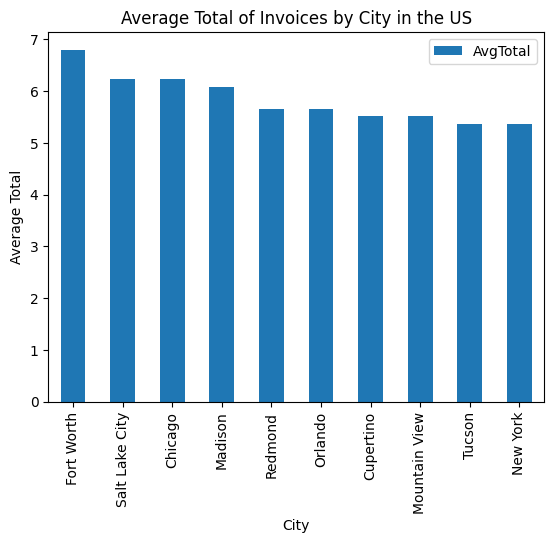

In [ ]:
# Select AVG total of invoices by cities in US then plot using bar chart
query = '''
  select BillingCity, avg(Total) as AvgTotal
  from invoices
  where BillingCountry = 'USA'
  group by BillingCity
  order by AvgTotal desc
  limit 10
'''

invoices = pd.read_sql_query( query , db_con)

invoices.plot(kind='bar', x='BillingCity', y='AvgTotal')
plt.xlabel('City')
plt.ylabel('Average Total')
plt.title('Average Total of Invoices by City in the US')
plt.show()





Heat Map

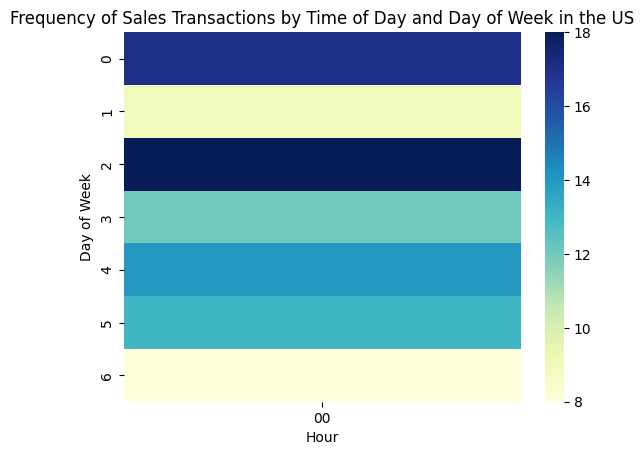

In [ ]:
#Use Heatmap to display data density or intensity to visualize the frequency of sales
#transactions across different times of the day and days of the week in the US.
query = '''
  select strftime('%H', InvoiceDate) as Hour, strftime('%w', InvoiceDate) as DayOfWeek, count(*) as Count
  from invoices
  where BillingCountry = 'USA'
  group by Hour, DayOfWeek
  order by Count
  limit 10
'''

invoices = pd.read_sql_query( query , db_con)

pivot_table = invoices.pivot_table(index='DayOfWeek', columns='Hour', values='Count', aggfunc='sum')

sns.heatmap(pivot_table, cmap='YlGnBu')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.title('Frequency of Sales Transactions by Time of Day and Day of Week in the US')
plt.show()






## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


We can predict Average customers for representatives by department

In [ ]:
# Utilize CTEs to select customers, their representatives, and supervisors

query = '''
with
emp as (
  select EmployeeID, FirstName, Lastname, ReportsTo, Title
  from employees
),
reps as (
  select EmployeeID, FirstName, Lastname, ReportsTo
  from emp
  where Title = "Sales Support Agent"
),
supervisors as (
  select EmployeeID, FirstName, Lastname
  from emp
  where Title != "Sales Support Agent"

),
workers as (
  select r.EmployeeID as "EmpID", r.Firstname as "Rep", r.ReportsTo as "ReportID", s.EmployeeID as "SuperID", s.FirstName as "Supervisor"
  from reps as r
  join supervisors as s
  where r.ReportsTo = s.EmployeeID
),
cust as (
  select CustomerID, FirstName as "Customer", SupportRepID
  from customers
),
cust_rep_super as (
  select Customer, Rep, Supervisor
  from cust
  join workers
  where SupportRepID = EmpID
)

SELECT *
FROM cust_rep_super
limit 10
'''


customers = pd.read_sql_query( query , db_con)
customers




,Customer,Rep,Supervisor
0,Luís,Jane,Nancy
1,François,Jane,Nancy
2,Roberto,Jane,Nancy
3,Jennifer,Jane,Nancy
4,Michelle,Jane,Nancy
5,Tim,Jane,Nancy
6,Frank,Jane,Nancy
7,Robert,Jane,Nancy
8,Edward,Jane,Nancy
9,Ellie,Jane,Nancy


In [ ]:
query = '''
WITH
emp AS (
  SELECT EmployeeID, FirstName, LastName, ReportsTo, Title
  FROM employees
),
reps AS (
  SELECT EmployeeID, FirstName, LastName, ReportsTo, Title
  FROM emp
  WHERE Title = "Sales Support Agent"
),
cust AS (
  SELECT CustomerID, SupportRepID
  FROM customers
),
cust_count AS (
  SELECT SupportRepID, COUNT(CustomerID) AS CustomerCount
  FROM cust
  GROUP BY SupportRepID
),
rep_with_title AS (
  SELECT r.EmployeeID AS RepID, r.FirstName AS RepName, r.Title, c.CustomerCount
  FROM reps r
  JOIN cust_count c ON r.EmployeeID = c.SupportRepID
),
max_customers AS (
  SELECT Title, MAX(CustomerCount) AS MaxCount
  FROM rep_with_title
  GROUP BY Title
)
SELECT r.Title, r.RepName, r.CustomerCount
FROM rep_with_title r
JOIN max_customers m
ON r.Title = m.Title AND r.CustomerCount = m.MaxCount;
'''
customers = pd.read_sql_query( query , db_con)
customers


,Title,RepName,CustomerCount
0,Sales Support Agent,Jane,21
